In [78]:
# working code to plot the nodes and connect to desired amount of neighbouring nodes
# added ignore list
# removed duplicated node locations

import pandas as pd
from geopy.distance import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Define the number of nodes to create connections for
num_connections = 20

ignore_list = [(36.068619, -115.211891),(35.759998,-115.760002),(35.650002,-115.650002), (41.2345, -112.6789), (42.3456, -113.7890)]

data = pd.read_csv('./detector/detectors2018.csv')

#data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing values in lat/long
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

locations, index = np.unique(np.column_stack((latitude, longitude)), axis=0, return_index=True)
ids = ids[index]

# Check if each location is in the ignore list and remove it if it is
mask = [tuple(loc) not in ignore_list for loc in locations]
locations = locations[mask]
ids = ids[mask]

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

graph = {}

for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        distance_km = distance(locations[i], locations[j]).kilometers
        graph[i].append((j, distance_km))



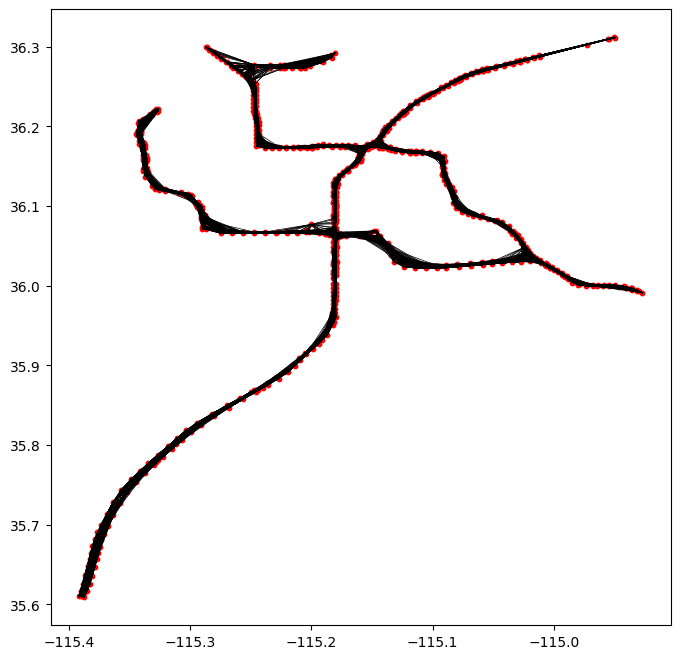

In [79]:
# Plot the graph with the set amount of edges
plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j, distance in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')
plt.show()

In [ ]:
# Print the adjacency list
for node in graph:
    for neighbor, distance in graph[node]:
        print(f"{node} {neighbor} {distance:.2f} km")